In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
#import seaborn as sns

In [2]:
#red points in Bishop
#mu1 = [1.5, -2]  
mu1 = [3.9, 1.5]
cov1 = [[0.8596, 0.1502], [0.1502, 0.3397]]
sample1 = np.random.multivariate_normal(mu1, cov1, 200) #class1

In [3]:
#blue points in Bishop
mu2 = [1, 2.8]  
cov2 = [[0.8596, 0.1502], [0.1502, 0.3397]]

sample2 = np.random.multivariate_normal(mu2, cov2, 200) #class2


In [249]:
#print(sample1)

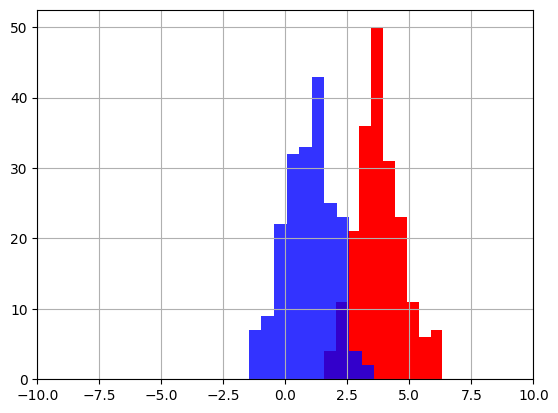

In [4]:
plt.hist(sample1[:, 0], color='red')
plt.hist(sample2[:,0], color='blue', alpha=0.8)
plt.xlim(-10, 10)
plt.grid()
plt.show()

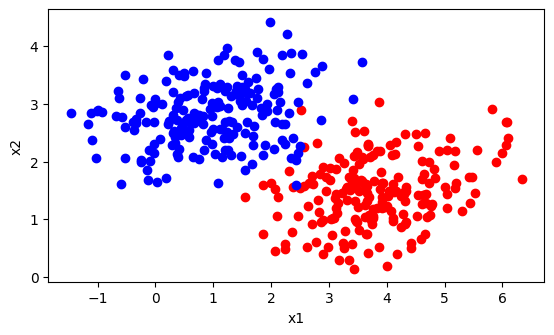

In [5]:
#correlation between samples from two classes (red and blue) in the 2D input space
# sample1 = 1st class and sample2 = 2nd class
plt.scatter(sample1[:,0], sample1[:,1], color='red')
plt.scatter(sample2[:,0], sample2[:,1], color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [8]:
X = np.append(sample1, sample2, axis=0) # X = [X1, X2] = [X1, X2] from sample1 and sample2 are stacked together = (row = N, column = 2)
# = np.append[(row = N/2, column = 2), (row = N/2, column = 2)]
#print(X)
Y = np.append([1 for points in sample1], [-1 for points in sample2], axis=0) # Y = (row = N, column = 2) = target vector

In [9]:
print(len(Y))
print(len(X))

400
400


In [10]:
#training and test set (75% training set and 25% test set for predictive analysis 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
sample1_train = X_train[Y_train == 1]  # Extract points where Y_train == 1
sample2_train = X_train[Y_train == -1]  # Extract points where Y_train == -1
# Adding a column as the "Target" i.e. the predicted value for y
#x1_x2_train = np.append(x1_train, x2_train, axis=0)
#x1_x2_test = np.append(x1_test, x2_test, axis=0)
#targets = np.append([1 for points in X[:,0]], [-1 for points in X[:,1]], axis=0)
#len(x1_x2_test)
#len(x1_train), len(x2_train)
#len(x1_test), len(x2_test)

### $y(x1, x2) = m1 \times x1 + m2 \times x2 + b$ - hyperplane
### in the $x1-x2$ plane $y = 0$ and it will be a line 
### equation of line $\Rightarrow \frac{x1}{(-b/m1)} + \frac{x2}{(-b/m2)} = 1$
### for plotting in x1-x2 space x-axis will be $x1$ values and corresponding values for $x2 = -\frac{b}{m2} - \frac{m1 \times x1}{m2}$
### will be y-axis

In [93]:
x1_1D = np.linspace(-7, 7, 1000)
x2_1D = np.linspace(-8, 8, 1000)
#len(x1_1D)
#len(x2_1D)
x1_x2_2D = np.append(x1_1D, x2_1D, axis=0)

Confusion Matrix:
[[47  1]
 [ 0 52]]


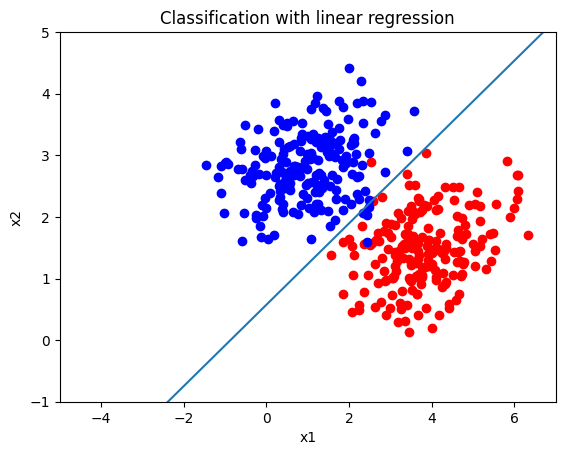

In [134]:
#Least Squares Discriminant 
X_train_augmented = np.hstack([X_train, np.ones((X_train.shape[0], 1))])  # Add bias term
w_lin = np.linalg.pinv(X_train_augmented).dot(Y_train)  # Compute weight vector using least squares

# Make predictions
X_test_augmented = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
Y_pred = np.sign(X_test_augmented.dot(w_lin))  # Predict using sign function
# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Optionally print confusion matrix
print("Confusion Matrix:")
print(cm)



#print(w)
plt.plot(x1_1D, -w_lin[2]/w_lin[1] - w_lin[0] * x1_1D/w_lin[1]) 
plt.scatter(sample1[:,0], sample1[:,1], color='red')
plt.scatter(sample2[:,0], sample2[:,1], color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Classification with linear regression")
plt.ylim(-1, 5)
plt.xlim(-5, 7)
plt.show()

In [ ]:
# Make predictions
#Y_pred = np.sign(linear_model(X_test, W))  # Use perceptron predictions

# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class -1', 'Class 1'], yticklabels=['Class -1', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Optionally print confusion matrix
print("Confusion Matrix:")
print(cm)

## Fisher Discriminant

### Weight vector becomes (Bishop's 4.30 equation) $\textbf{w} \propto \textbf{S}^{-1}_w (\textbf{m2} - \textbf{m1})$
### where, 
### $\textbf{S}_w = \sum_{n \in \textit{C}_1} (\textbf{x}_n - \textbf{m}_1)(\textbf{x}_n - \textbf{m}_1)^T + \sum_{n \in \textit{C}_2} (\textbf{x}_n - \textbf{m}_2)(\textbf{x}_n - \textbf{m}_2)^T$ (Bishop's 4.28 equation)
### $\textbf{m}_1 = \frac{1}{N_1} \sum_{n \in \textit{C}_1} \textbf{x}_n$ (Bishop's 4.21 equation)
### $\textbf{m}_2 = \frac{1}{N_2} \sum_{n \in \textit{C}_2} \textbf{x}_n$ (Bishop's 4.21 equation)

Confusion Matrix:
[[47  1]
 [ 0 52]]


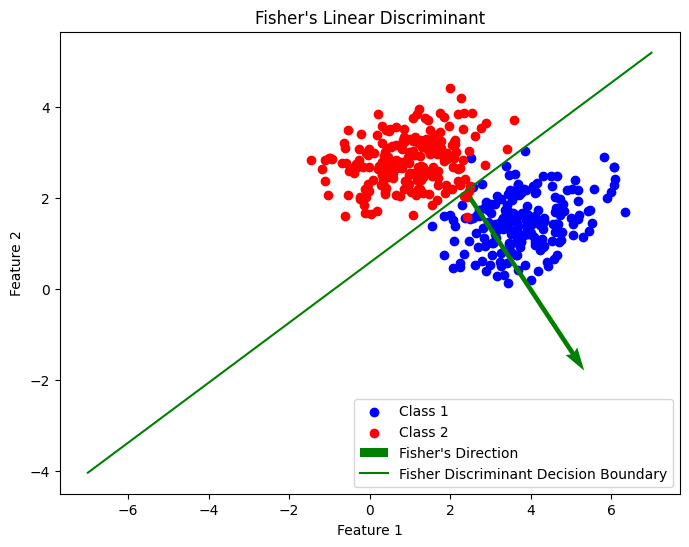

[ 0.01380385 -0.0208952 ]


In [135]:
# Compute class means
m1 = np.mean(X_train[Y_train == 1], axis=0)
m2 = np.mean(X_train[Y_train == -1], axis=0)

# Compute within-class scatter matrix
S1 = sum(np.outer(x - m1, x - m1) for x in X_train[Y_train == 1])
S2 = sum(np.outer(x - m2, x - m2) for x in X_train[Y_train == -1])
S_W = S1 + S2
# Compute Fisher's discriminant vector
w_fish = np.linalg.inv(S_W).dot(m1 - m2)

# Project training and test data onto w
proj_train = np.dot(X_train, w_fish)
proj_test = np.dot(X_test, w_fish)

# Compute threshold for classification
threshold = (np.dot(w_fish, m1) + np.dot(w_fish, m2)) / 2

# Predictions
Y_pred = np.where(proj_test > threshold, 1, -1)

# Plot the data and Fisher's projection line
plt.figure(figsize=(8,6))
plt.scatter(sample1[:, 0], sample1[:, 1], color='blue', label='Class 1')
plt.scatter(sample2[:, 0], sample2[:, 1], color='red', label='Class 2')

# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Optionally print confusion matrix
print("Confusion Matrix:")
print(cm)
# Plot the Fisher discriminant direction
w_dir = w_fish / np.linalg.norm(w_fish)
plt.quiver(2.5, 2, w_dir[0], w_dir[1], scale=3, color='green', label="Fisher's Direction")
plt.plot(x1_1D, -x1_1D * w_fish[0]/w_fish[1] + threshold/w_fish[1], label="Fisher Discriminant Decision Boundary", color="green")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Fisher's Linear Discriminant")
plt.show()
print(w_fish)

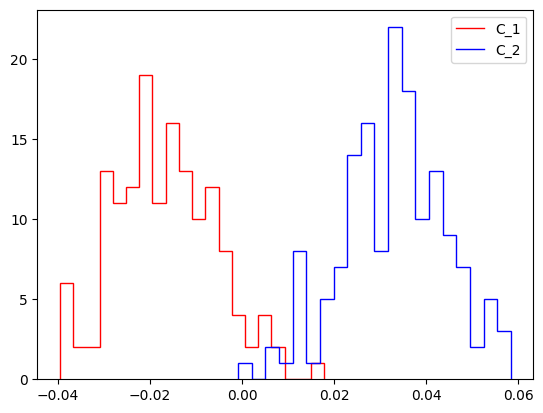

In [126]:
fig = plt.figure()
counts_1, bins_1 = np.histogram(np.array([i.dot(w) for i in sample1_train]), bins=20)
counts_2, bins_2 = np.histogram(np.array([i.dot(w) for i in sample2_train]), bins=20)
plt.stairs(counts_1, bins_1, color="red", label="C_1")
plt.stairs(counts_2, bins_2, color="blue", label="C_2")
plt.legend()

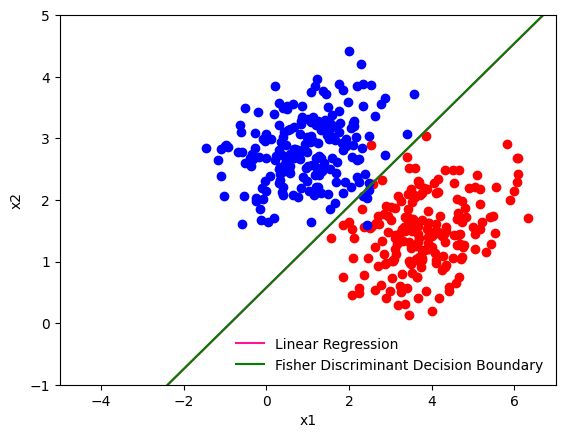

In [131]:
plt.plot(x1_1D, -w_lin[2]/w_lin[1] - w_lin[0] * x1_1D/w_lin[1], color="deeppink", label="Linear Regression") 
#plt.plot(x1_1D, -x1_1D * w_fish[0]/w_fish[1] + 0/w_fish[1], label="Fisher Discriminant Decision Boundary", color="green")
plt.plot(x1_1D, -x1_1D * w_fish[0]/w_fish[1] + threshold/w_fish[1], label="Fisher Discriminant Decision Boundary", color="green")
plt.scatter(sample1[:,0], sample1[:,1], color='red')
plt.scatter(sample2[:,0], sample2[:,1], color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.ylim(-1, 5)
plt.xlim(-5, 7)
plt.legend(frameon=False)
plt.show()

# Perceptron

In [76]:
def initialize_parameters(n_features):
    W = np.zeros(n_features + 1)  # Add 1 extra dimension for w0
    return W

 
def update_coefficient(X, y, W, eta, itr):
    X_augmented = np.hstack([X, np.ones((X.shape[0], 1))])  # Augment input with bias term

    for _ in range(itr):
        y_pred = np.sign(np.dot(X_augmented, W))  # Predictions
        misclassified = np.where(y_pred != y)[0]  # Indices of misclassified points
        
        # Apply the weight update rule for each misclassified point
        for n in misclassified:
            W += eta * y[n] * X_augmented[n]  # Update step (Eq. 4.55)

    return W

def perceptron(X, y, eta=0.01, itr=1000):
    n_features = X.shape[1]  # Number of features
    W = initialize_parameters(n_features)
    W = update_coefficient(X, y, W, eta, itr)
    return W

In [139]:
w_percep = perceptron(X_train, Y_train, eta=0.01, itr=1000)
print(f"Trained Weights: {W}")
    
# Make predictions
Y_pred = linear_model(X_test, w_percep)
#print(f"Predictions: {predictions}")
w_percep.shape
w_percep[0]
print(Y_test)

Trained Weights: [ 3.82285531 -4.29323035 -0.19      ]
[-1 -1  1 -1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1
  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1
  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1 -1  1 -1  1
  1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1 -1 -1  1  1 -1 -1  1 -1  1 -1
 -1 -1 -1  1]


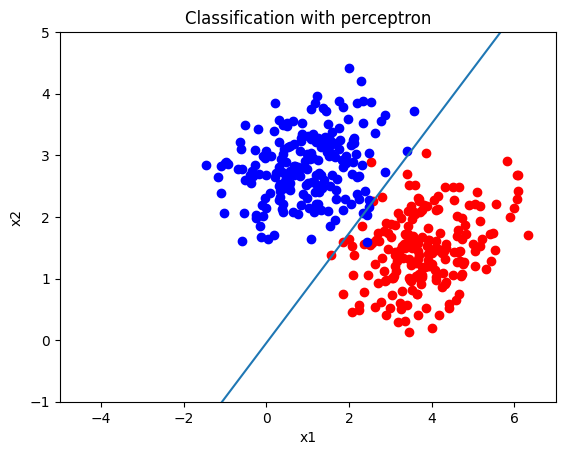

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [140]:
plt.plot(x1_1D, -w_percep[2]/w_percep[1] - w_percep[0] * x1_1D/w_percep[1], label='perceptron') 
plt.scatter(sample1[:,0], sample1[:,1], color='red')
plt.scatter(sample2[:,0], sample2[:,1], color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Classification with perceptron")
plt.ylim(-1, 5)
plt.xlim(-5, 7)
plt.show()
# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Optionally print confusion matrix
print("Confusion Matrix:")
print(cm)

# Least square classification with regularization

In [117]:
ridge = Ridge(alpha=0.01)  # Regularization strength (alpha)
ridge.fit(X_train, Y_train)
class_predict = ridge.predict(X_test)

In [118]:
w_ridge = ridge.coef_
intercept_ridge = ridge.intercept_
print(coefficient_ridge, intercept_ridge)

[ 0.34394649 -0.51770015] 0.2990989673229568


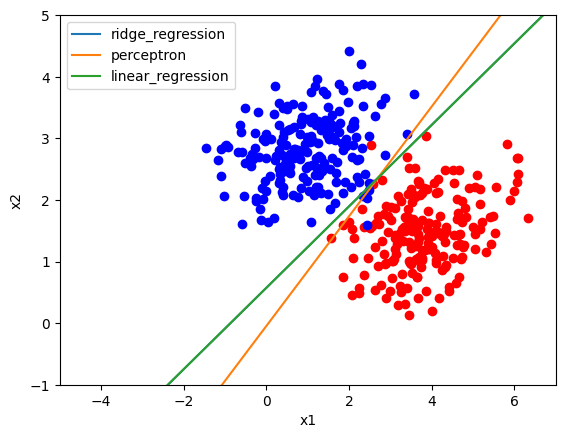

In [122]:
plt.plot(x1_1D, -intercept_ridge/w_ridge[1] - coefficient_ridge[0] * x1_1D/w_ridge[1], label='ridge_regression')
plt.plot(x1_1D, -w_percep[2]/w_percep[1] - w_percep[0] * x1_1D/w_percep[1], label='perceptron')
#plt.plot(x1_1D, -intercept/coefficient[1] - coefficient[0] * x1_1D/coefficient[1], label='linear_regression')
plt.plot(x1_1D, -w_lin[2]/w_lin[1] - w_lin[0] * x1_1D/w_lin[1], label='linear_regression')
plt.scatter(sample1[:,0], sample1[:,1], color='red')
plt.scatter(sample2[:,0], sample2[:,1], color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
#plt.title("Classification with linear ridge regression using inbuilt Ridgefunction")
plt.legend()
plt.ylim(-1, 5)
plt.xlim(-5, 7)
plt.show()